<a href="https://colab.research.google.com/github/ueki5/colaboratory/blob/main/playground_022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
!pip install japanize-matplotlib | tail -n 1
!pip install plotly | tail -n 1

cuda:0
訓練データの件数: 50000
訓練データの型： <class 'torch.Tensor'>
訓練データのshape： torch.Size([3072])
最小値： tensor(-1.)
最大値： tensor(1.)
検証データの件数: 10000
検証データの型： <class 'torch.Tensor'>
検証データのshape： torch.Size([3072])
最小値： tensor(-0.8980)
最大値： tensor(1.)
入力層の次元数: 3072
中間層の次元数: 128
出力層の次元数: 10
バッチ繰返回数: 10
ミニバッチサイズ: 500
ミニバッチ回数（訓練）: 100
ミニバッチ回数（検証）: 20
予測関数0 入力次元数:3072, 出力次元数:128
予測関数1 入力次元数:128, 出力次元数:10


  0%|          | 0/100 [00:00<?, ?it/s]

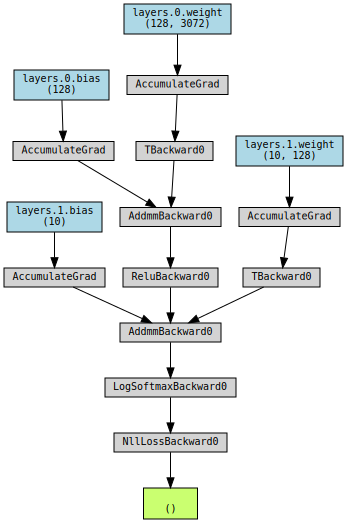

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

開始　　23:09:08.830270
終了　　23:11:40.904788
処理　　00:02:32.074518
初期状態: 損失: 2.05067 精度: 0.30040
最終状態: 損失: 1.67320 精度: 0.41820


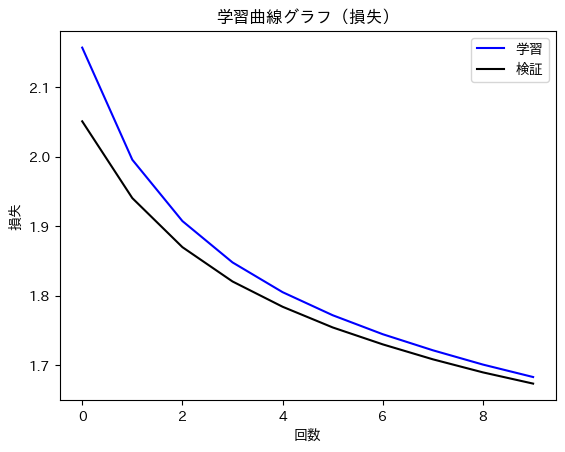

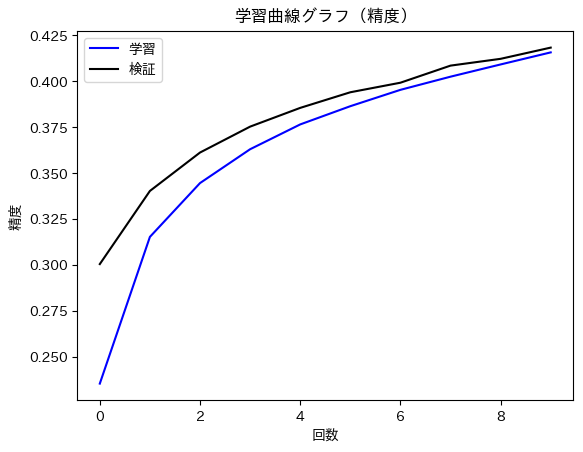

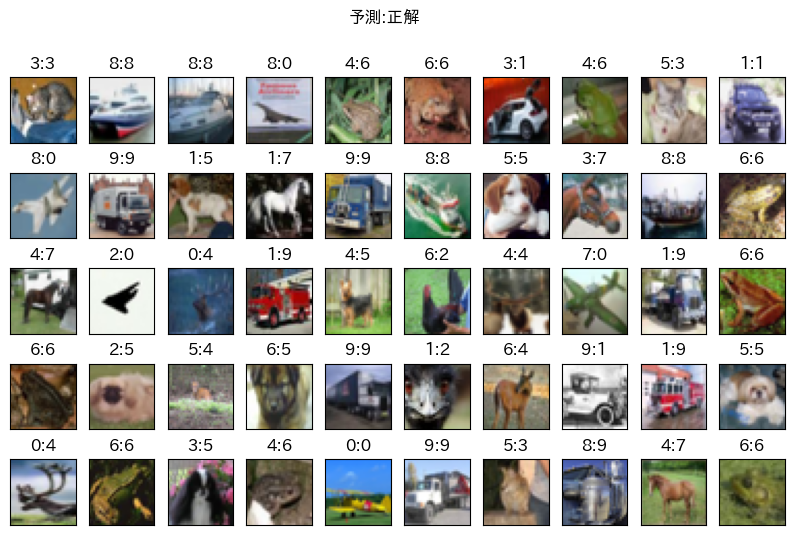

In [ ]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
japanize_matplotlib.japanize()
from tqdm.notebook import tqdm
import torch
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchviz import make_dot

# 各種定数
batch_size = 500 # ミニバッチのサイズ指定
num_epochs = 10 # 繰り返し回数
lr = 0.01  # 学習率
dim_hidden = 128 # 隠れ層の次元数
dim_output = 10 # 出力層の次元数
num_layer = 2 # レイヤー数
use_cuda = True # CUDA使用

# デバイスの割り当て
if use_cuda:
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
else:
  device = torch.device("cpu")
print(device)

# ダウンロード先ディレクトリ名
data_root = './data'
# テンソル化 ＋ 正規化
transform = transforms.Compose([
  # データのテンソル化
  transforms.ToTensor(),
  # データの正規化(Normalize(μ, σ) ⇒ (x - μ) / σ)
  transforms.Normalize(0.5, 0.5),
])
# 訓練データ
train_set = datasets.CIFAR10(
  root=data_root,
  train=True,
  download=True,
  transform=transform
)
# 検証データ
test_set = datasets.CIFAR10(
  root=data_root,
  train=False,
  download=True,
  transform=transform
)
# データ変換結果の確認
print('# 入力データの確認')
image, label = train_set[0]
print('訓練データの件数:', len(train_set))
print('訓練データの型：', type(image))
print('訓練データのshape：', image.shape)
print('最小値：', image.data.min())
print('最大値：', image.data.max())

image, label = test_set[0]
print('検証データの件数:', len(test_set))
print('検証データの型：', type(image))
print('検証データのshape：', image.shape)
print('最小値：', image.data.min())
print('最大値：', image.data.max())

# # 訓練用データローダー
# # 訓練用なので、シャッフルをかける
# train_loader = DataLoader(
#     train_set,
#     batch_size = batch_size,
#     shuffle = True,
# )
# # 検証用データローダー
# # 検証用にシャッフルは不要
# test_loader = DataLoader(
#     test_set,
#     batch_size = batch_size,
#     shuffle = False,
# )

# # データローダーの最初の１セットから、データの次元数を取得
# inputs, labels = next(iter(train_loader))
# # 入力次元数
# n_input = inputs.shape[1] # 0:ミニバッチサイズ、1:入力次元数
# # 出力次元数
# n_output = dim_output
# # 隠れ層の次元数
# n_hidden = dim_hidden

# ###################################################
# # 関数定義
# ###################################################
# class Net(torch.nn.Module):
#     def __init__(self, n_input, n_output, n_hidden, n_layer):
#         super().__init__()

#         # 予測関数
#         layers = []
#         for i in range(n_layer):
#             _n_input = n_hidden
#             _n_output = n_hidden
#             if i == 0:
#                 _n_input = n_input
#             if i == n_layer - 1:
#                 _n_output = n_output
#             print(f'予測関数{i} 入力次元数:{_n_input}, 出力次元数:{_n_output}')
#             layers.append(torch.nn.Linear(_n_input, _n_output))
#         self.layers = torch.nn.ModuleList(layers)

#         # ReLU関数
#         self.relu = torch.nn.ReLU(inplace=True)

#     # 予測関数
#     def forward(self, inputs):
#       x = self.layers[0](inputs)
#       for layer in self.layers[1:]:
#         x = self.relu(x)
#         x = layer(x)
#       return x

# ###########################
# # メイン処理
# ###########################
# num_data = len(train_loader)
# num_data_test = len(test_loader)
# print('# 訓練・検証')
# print('入力層の次元数:', n_input)
# print('中間層の次元数:', n_hidden)
# print('出力層の次元数:', n_output)
# print('バッチ繰返回数:', num_epochs)
# print('ミニバッチサイズ:', batch_size)
# print('ミニバッチ回数（訓練）:', num_data)
# print('ミニバッチ回数（検証）:', num_data_test)

# start_time = datetime.now()
# # 予測計算オブジェクトの作成
# net = Net(n_input, n_output, n_hidden, num_layer).to(device)
# # 損失関数
# criterion = torch.nn.CrossEntropyLoss()
# # 最適化関数
# optimizer = torch.optim.SGD(net.parameters(), lr=lr)
# # 記録用配列初期化()
# history = np.zeros((0, 5))

# # 訓練＆検証
# for epoch in range(num_epochs):
#   ###########################
#   # 履歴保存用変数
#   ###########################
#   # １エポック当たりの正解データ累積件数
#   n_cum_train_acc = 0
#   n_cum_test_acc = 0
#   # １エポック当たりの累積損失（平均化前）
#   cum_train_loss = 0
#   cum_test_loss = 0
#   # １エポック当たりのデータ累積件数
#   n_cum_train = 0
#   n_cum_test = 0

#   ###########################
#   # 学習
#   ###########################
#   for idx, (inputs, labels) in enumerate(tqdm(train_loader)):
#     # 入力データをデバイスへ転送
#     inputs = inputs.to(device)
#     labels = labels.to(device)
#     # 予測計算
#     outputs = net(inputs)
#     # 損失計算
#     loss = criterion(outputs, labels)
#     # 最初の１回のみ、計算グラフ（予測、損失）を描画
#     if epoch == 0 and idx == 0:
#         g = make_dot(loss, params = dict(net.named_parameters()))
#         display(g)
#     # 勾配計算
#     loss.backward()
#     # パラメータ調整
#     optimizer.step()
#     # 勾配クリア
#     optimizer.zero_grad()
#     # 損失の保存（スカラー値の取得）
#     train_loss = loss.item()
#     # 予測データ（0, 1, ... ,9）計算
#     predicted = torch.max(outputs, 1)

#     # １バッチ当たりのデータ件数
#     train_batch_size = len(labels)
#     # １エポック当たりのデータ累積件数
#     n_cum_train += train_batch_size
#     # 正解数の保存
#     n_train_acc = (predicted.indices == labels).sum()
#     # １エポック当たりの累積正解数
#     n_cum_train_acc += n_train_acc
#     # １エポック当たりの累積損失（平均化前）
#     cum_train_loss += train_loss * train_batch_size

#   ###########################
#   # 検証
#   ###########################
#   for inputs_test, labels_test in tqdm(test_loader):
#     # 入力データをデバイスへ転送
#     inputs_test = inputs_test.to(device)
#     labels_test = labels_test.to(device)
#     # 予測計算
#     outputs_test = net(inputs_test)
#     # 損失計算
#     loss = criterion(outputs_test, labels_test)
#     # 損失の保存（スカラー値の取得）
#     test_loss = loss.item()
#     # 予測データ（0, 1, ... ,9）計算
#     predicted_test = torch.max(outputs_test, 1)

#     # １バッチ当たりのデータ件数
#     test_batch_size = len(labels_test)
#     # １エポック当たりのデータ累積件数
#     n_cum_test += test_batch_size
#     # 正解数の保存
#     n_test_acc = (predicted_test.indices == labels_test).sum()
#     # １エポック当たりの累積正解数
#     n_cum_test_acc += n_test_acc
#     # １エポック当たりの累積損失（平均化前）
#     cum_test_loss += test_loss * test_batch_size

#   ###########################
#   # 履歴を保存
#   ###########################
#   item = np.array([
#     epoch,
#     cum_train_loss / n_cum_train,
#     (n_cum_train_acc / n_cum_train).cpu(),
#     cum_test_loss / n_cum_test,
#     (n_cum_test_acc / n_cum_test).cpu(),
#   ])
#   history = np.vstack((history, item))

# end_time = datetime.now()
# td = end_time - start_time
# total_us = td.seconds * 1_000_000 + td.microseconds
# h = total_us // (3600 * 1_000_000)
# m = (total_us // (60 * 1_000_000)) % 60
# s = (total_us // 1_000_000) % 60
# us = total_us % 1_000_000
# print(f'開始　　{start_time.strftime("%H:%M:%S.%f")}')
# print(f'終了　　{end_time.strftime("%H:%M:%S.%f")}')
# print(f'処理　　{h:02}:{m:02}:{s:02}.{us:06}')

# ###############################################
# # 結果表示
# ###############################################
# # 損失と精度の確認
# print(f'初期状態: 損失: {history[ 0, 3]:.5f} 精度: {history[ 0, 4]:.5f}')
# print(f'最終状態: 損失: {history[-1, 3]:.5f} 精度: {history[-1, 4]:.5f}')

# # 学習曲線グラフ（損失）
# plt.plot(history[:, 0], history[:, 1], 'b', label='学習')
# plt.plot(history[:, 0], history[:, 3], 'k', label='検証')
# plt.xlabel('回数')
# plt.ylabel('損失')
# plt.title('学習曲線グラフ（損失）')
# plt.legend()
# plt.show()

# # 学習曲線グラフ（精度）
# plt.plot(history[:, 0], history[:, 2], 'b', label='学習')
# plt.plot(history[:, 0], history[:, 4], 'k', label='検証')
# plt.xlabel('回数')
# plt.ylabel('精度')
# plt.title('学習曲線グラフ（精度）')
# plt.legend()
# plt.show()

# #######################################################
# # 予測・正解サンプリング
# # 正解データ付きで、最初のX0個をイメージ表示
# #######################################################
# # 画像データを取り直し
# img_set = datasets.CIFAR10(
#   root = data_root,
#   train = False,
#   download = True,
# )
# # 検証データを最初の500件だけ再計算
# inputs_test, labels_test = next(iter(test_loader))
# # 入力データをデバイスへ転送
# inputs_test = inputs_test.to(device)
# labels_test = labels_test.to(device)
# # 予測計算
# outputs_test = net(inputs_test)
# # 予測データ（0, 1, ... ,9）計算
# predicted_test = torch.max(outputs_test, 1)

# # 最初のROW_NUM×COL_NUM件だけ、予測・正解データ付きでイメージを表示
# ROW_NUM = 5
# COL_NUM = 10
# fig = plt.figure(figsize=(COL_NUM, ROW_NUM + 1))
# plt.suptitle('予測:正解')
# for i in range(COL_NUM * ROW_NUM):
#   image, label = img_set[i]
#   ax = plt.subplot(ROW_NUM, COL_NUM, i + 1)
#   # イメージ表示
#   plt.imshow(image)
#   ax.set_title(f'{predicted_test.indices[i]}:{label}')
#   ax.get_xaxis().set_visible(False)
#   ax.get_yaxis().set_visible(False)
# plt.show()
